In [70]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
from scipy import stats
from scipy import optimize

In [71]:
Excel=pd.ExcelFile("Datos/practica1Avanzado.xlsx")

In [72]:
Excel.sheet_names

['Hoja1',
 'Conteos_Distancia_doble',
 'Conteos_Distancia_una',
 'Voltaje',
 'Exp_Voltaje_VS_Conteos',
 'intensidad',
 'Hoja2',
 'Conteos_intensidad']

In [73]:
datos=pd.read_excel(Excel,sheet_name='Exp_Voltaje_VS_Conteos')

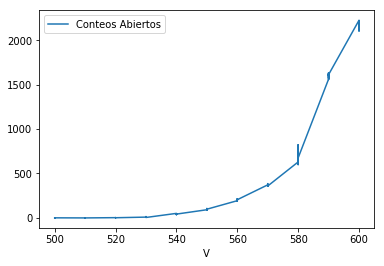

In [74]:
datos.plot(x="V",y="Conteos Abiertos",kind="line")

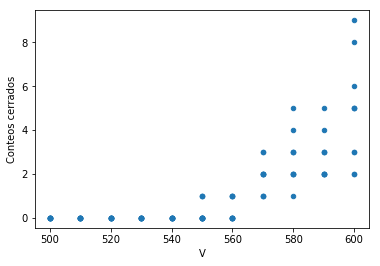

In [75]:
datos.plot(x="V",y="Conteos cerrados",kind="scatter")

In [76]:
STD_datos=datos.groupby("V").std()
STD_datos=STD_datos.reset_index()

In [77]:
Promedios_datos=datos.groupby("V").mean()
Promedios_datos=Promedios_datos.reset_index()

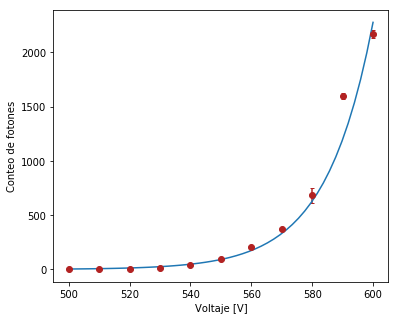

In [78]:
plt.figure(figsize=(6,5))
#plt.errorbar(Promedios_datos["V"],Promedios_datos["Conteos Abiertos"],yerr=STD_datos["Conteos Abiertos"],
 #            color="navy",capsize=2,marker='.',mfc='firebrick',ms=10,mew=1,mec='firebrick')
plt.errorbar(Promedios_datos["V"],Promedios_datos["Conteos Abiertos"],yerr=STD_datos["Conteos Abiertos"],
             capsize=2,fmt="o",color="firebrick")
plt.xlabel("Voltaje [V]")
plt.ylabel("Conteo de fotones")
x=np.linspace(500,600)
plt.plot(x,4*10**(-14)*np.exp(0.0643*x))
plt.show()

In [79]:
def model(x,a,b):
    return a*np.exp(b*x)
    #return a*np.exp(b*x)+c

In [80]:
x_obs=np.array(Promedios_datos["V"])
y_obs=np.array(Promedios_datos["Conteos Abiertos"])
sigma_y_obs=np.array(STD_datos["Conteos Abiertos"])

In [81]:
ajuste=[4*10**(-14),0.0643]

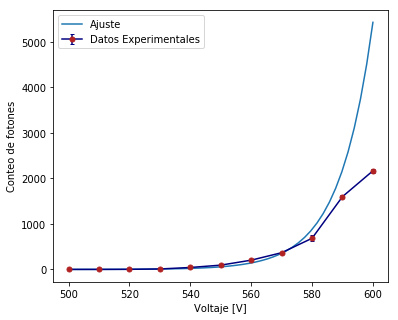

In [82]:
plt.figure(figsize=(6,5))
plt.errorbar(Promedios_datos["V"],Promedios_datos["Conteos Abiertos"],yerr=STD_datos["Conteos Abiertos"],
             color="navy",capsize=2,marker='.',mfc='firebrick',ms=10,mew=1,mec='firebrick',label="Datos Experimentales")
#plt.errorbar(x_obs,y_obs,yerr=sigma_y_obs,capsize=2,fmt="o",color="firebrick")
plt.plot(x,model(x,np.exp(-46),0.091),label="Ajuste")
#plt.plot(x,model(x,ajuste[0],ajuste[1]),label="Ajuste")
plt.xlabel("Voltaje [V]")
plt.ylabel("Conteo de fotones")
plt.legend()
plt.show()

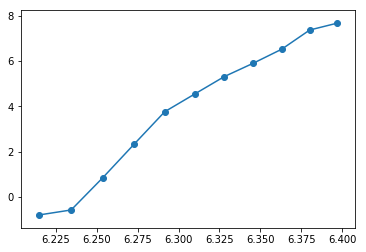

In [83]:
plt.plot(np.log(x_obs),np.log(y_obs))
plt.scatter(np.log(x_obs),np.log(y_obs))
plt.show()

In [84]:
def model(x,a,b):
    return a*x+b

In [85]:
y_obslog=np.log(y_obs)
y_err=np.abs(1.0/(Promedios_datos["Conteos Abiertos"])*np.log(Promedios_datos["Conteos Abiertos"])*STD_datos["Conteos Abiertos"])
popt, pcov = curve_fit(model, x_obs, y_obslog,sigma=y_err,absolute_sigma= True)

x=np.linspace(min(x_obs),max(x_obs))
perr = np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

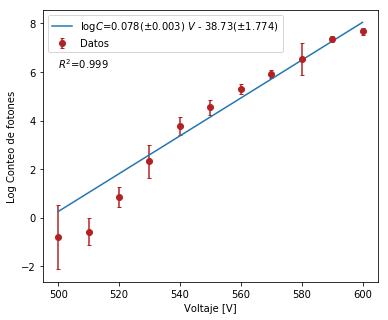

In [86]:
fig=plt.figure(figsize=(6,5))
#plt.errorbar(np.log(Promedios_datos["V"]),np.log(Promedios_datos["Conteos Abiertos"]),yerr=y_err,
             #color="navy",capsize=2,marker='.',mfc='firebrick',ms=10,mew=1,mec='firebrick',label="Datos Experimentales")
plt.errorbar(x_obs,y_obslog,yerr=y_err,capsize=2,fmt="o",color="firebrick",label="Datos")
            #ret += '({}{})'.format(i, '**%d' % num if num > 1 else '')
plt.plot(x,model(x,popt[0],popt[1]),label=r"$\logC$={}($\pm${}) $V$ {} {}($\pm${})".format(round(popt[0],3),
                                                                                    round(perr[0],3),"+" if popt[1]>0 else "-",
                                                                                    round(np.abs(popt[1]),2),round(perr[1],3)))

plt.text(min(x_obs), 0.8*max(y_obslog), r'$R^2$={}'.format(round(R_2,3)))
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlabel("Voltaje [V]")
plt.ylabel("Log Conteo de fotones")
plt.legend()
plt.savefig("Figuras/fotomultiplicador.png")
plt.show()

In [87]:
conteos=pd.read_excel(Excel,sheet_name='Conteos_intensidad')

In [88]:
mean=conteos.groupby("intensidad ").mean().reset_index()
mean.columns=["Intensidad","Mean"]

In [89]:
mean_sqrt=np.sqrt(conteos.groupby("intensidad ").mean()).reset_index()
mean_sqrt.columns=["Intensidad","Mean sqrt"]

In [90]:
std=conteos.groupby("intensidad ").std().reset_index()
std.columns=["Intensidad","Std"]

In [91]:
total=pd.merge(mean,std,on="Intensidad")
total=pd.merge(total,mean_sqrt,on="Intensidad")
total["Log std"]=np.log(total["Std"])

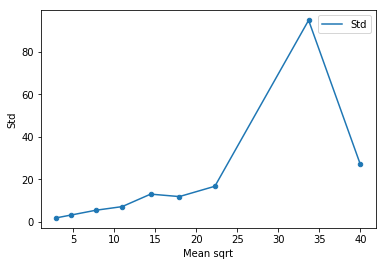

In [92]:
#ax = plt.gca()
ax=total.plot("Mean sqrt","Std",kind="scatter")
total.plot("Mean sqrt","Std",ax=ax)
plt.show()

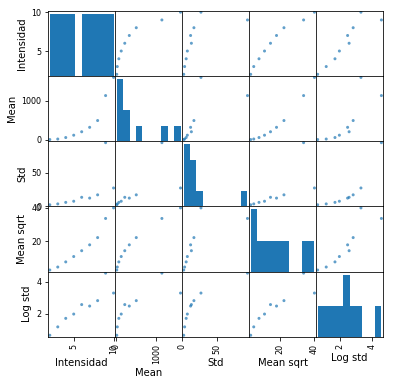

In [93]:
pd.plotting.scatter_matrix(total,figsize=(6, 6),alpha=0.7)
plt.show()

In [94]:
x_obs=total["Mean sqrt"]
y_obslog=total["Log std"]
x=np.linspace(min(x_obs),max(x_obs))
popt, pcov = curve_fit(model, x_obs, y_obslog)
perr = np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

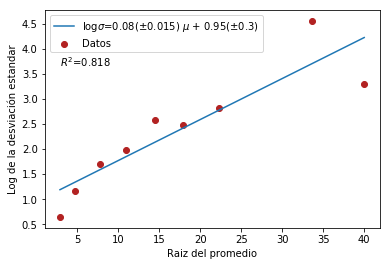

In [100]:
plt.scatter(total["Mean sqrt"],total["Log std"],color="firebrick",label="Datos")
#total.plot("Mean sqrt","Log std",ax=ax)
plt.plot(x,model(x,popt[0],popt[1]),label=r"$\log\sigma$={}($\pm${}) $\mu$ {} {}($\pm${})".format(round(popt[0],2),
                                                                                round(perr[0],3),"+" if popt[1]>0 else "-",
                                                                                round(np.abs(popt[1]),2),round(perr[1],1)))
plt.text(min(x_obs), 0.8*max(y_obslog), r'$R^2$={}'.format(round(R_2,3)))
plt.legend()
plt.xlabel("Raiz del promedio")
plt.ylabel("Log de la desviación estandar")
plt.savefig("Figuras/sqrt_promedio_std.png")
plt.show()

In [ ]:
def p(n,avg):
    return 1.0/(avg+1)*(avg/(avg+1))**n

In [ ]:
n=np.linspace(0,1000)
conteos[conteos.conteo<1000].conteo.plot(kind="kde",xlim=(60,1000),label="kde",bw_method="scott",figsize=(8,5))
plt.plot(n,p(n,330),label="ajuste")
plt.xlabel("Conteos")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.savefig("Figuras/Distribucion.png")
plt.show()

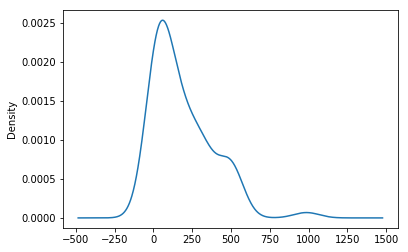

In [96]:
conteos[conteos.conteo<1000].conteo.plot.kde()

In [30]:
kernel=stats.gaussian_kde(conteos.conteo,bw_method=0.19)
ind = np.linspace(100,1000,1000)
kdepdf=kernel.evaluate(ind)

$$\alpha=\frac{\pi a}{\lambda}\sin(\theta)$$
$$\theta\approx \frac{y}{L}$$

In [31]:
def Intensidad_difraccion(alpha):
    return (np.sin(alpha)/alpha)**2
def function_alpha(y_pos):
    return np.pi*1.0*10**(-4)/(670*10**(-9))*y_pos
def Intensidad_interferencia(y_pos):
    return (np.cos((np.pi*0.000356*y_pos)/(670*10**(-9))))**2

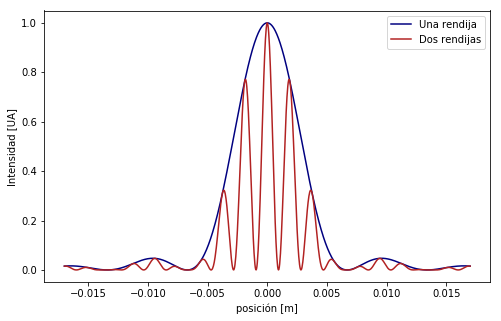

In [32]:
plt.figure(figsize=(8,5))
y=np.linspace(-0.017,0.017,1000)
plt.plot(y,Intensidad_difraccion(function_alpha(y)),color="navy",label="Una rendija")
plt.plot(y,Intensidad_interferencia(y)*Intensidad_difraccion(function_alpha(y)),color="firebrick", label="Dos rendijas")
plt.legend()
plt.xlabel("posición [m]")
plt.ylabel("Intensidad [UA]")
plt.savefig("Figuras/Ejemplo_interferencia.png")
plt.show()

In [33]:
Intensidad_doble=pd.read_excel(Excel,sheet_name='Conteos_Distancia_doble')
Intensidad_doble["Distancia"]=Intensidad_doble["Distancia"]/1000

In [34]:
print(Intensidad_doble[Intensidad_doble["Voltaje"]==530].groupby("Distancia").std()["Conteos"].mean())
print(Intensidad_doble[Intensidad_doble["Voltaje"]==530].groupby("Distancia").std()["Conteos"].std())

2.2069117718193114
0.9274938447654663


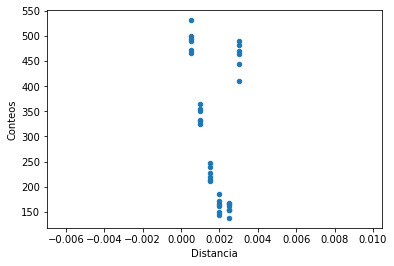

In [35]:
Intensidad_doble[Intensidad_doble["Voltaje"]==590].plot("Distancia","Conteos",kind="scatter")

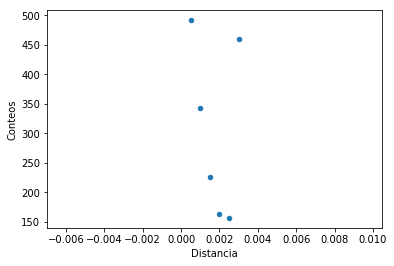

In [36]:
Intensidad_doble[Intensidad_doble["Voltaje"]==590].groupby("Distancia").mean().reset_index().plot("Distancia","Conteos",kind="scatter")

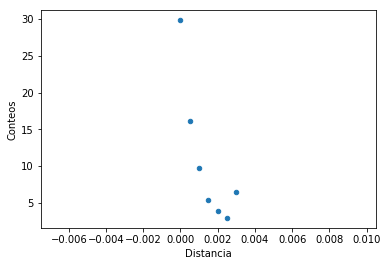

In [37]:
Intensidad_doble[Intensidad_doble["Voltaje"]==530].groupby("Distancia").mean().reset_index().plot("Distancia","Conteos",kind="scatter")

Verde entre $560 - 590$ nm

In [38]:
def Intensidad_difraccion(alpha):
    return (np.sin(alpha)/alpha)**2
def function_alpha(y_pos,wave_length):
    return np.pi*1.0*10**(-4)/(wave_length)*y_pos
def Intensidad_interferencia(y_pos,wave_length):
    return (np.cos((np.pi*35.6*10**(-5)*y_pos)/(wave_length)))**2

e 0.356mm,0.406mm y 0.457mm

Text(0.5, 1.0, 'Voltaje $V=590$')

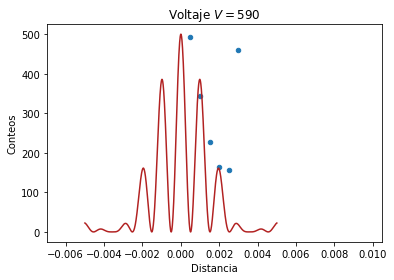

In [39]:
y=np.linspace(-5.0/1000,5.0/1000,1000)
wave_length=360*10**(-9)
Intensidad_doble[Intensidad_doble["Voltaje"]==590].groupby("Distancia").mean().reset_index().plot("Distancia","Conteos",kind="scatter")

plt.plot(y,500*Intensidad_interferencia(y,wave_length)*Intensidad_difraccion(function_alpha(y,wave_length)),color="firebrick", label="Dos rendijas")
plt.title(r"Voltaje $V=590$")

Text(0.5, 1.0, 'Voltaje $V=590$')

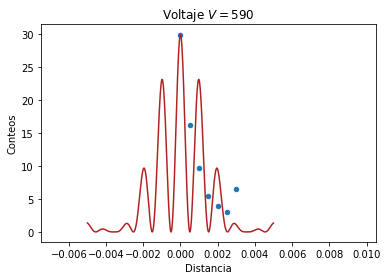

In [40]:
y=np.linspace(-5.0/1000,5.0/1000,1000)
wave_length=360*10**(-9)
Intensidad_doble[Intensidad_doble["Voltaje"]==530].groupby("Distancia").mean().reset_index().plot("Distancia","Conteos",kind="scatter")

plt.plot(y,30*Intensidad_interferencia(y,wave_length)*Intensidad_difraccion(function_alpha(y,wave_length)),color="firebrick", label="Dos rendijas")
plt.title(r"Voltaje $V=590$")

Usar entonces las medidas tomadas a $V=530$ $\lambda=590$ nm $d=0.136$ mm


In [41]:
wave_length=530*10**(-9)
mediciones=[]
distancia_y=[]
for i in range(20):
    y = np.random.uniform(-3.3/1000,3.3/1000)
    m=30*Intensidad_interferencia(y,wave_length)*Intensidad_difraccion(function_alpha(y,wave_length))+np.random.normal(0.05,2)
    mediciones.append(m)
    distancia_y.append(y)
    m=30*Intensidad_interferencia(-y,wave_length)*Intensidad_difraccion(function_alpha(-y,wave_length))+np.random.normal(0,2)
    mediciones.append(m)
    distancia_y.append(-y)
    #30*Intensidad_interferencia(y,wave_length)*Intensidad_difraccion(function_alpha(y,wave_length)

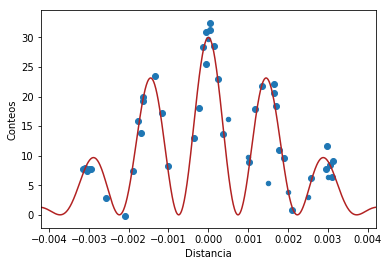

In [42]:
y=np.linspace(-5.0/1000,5.0/1000,1000)
Intensidad_doble[Intensidad_doble["Voltaje"]==530].groupby("Distancia").mean().reset_index().plot("Distancia","Conteos",kind="scatter")
plt.scatter(distancia_y,mediciones)
plt.plot(y,30*Intensidad_interferencia(y,wave_length)*Intensidad_difraccion(function_alpha(y,wave_length)),color="firebrick", label="Dos rendijas")
plt.xlim(-4.2/1000,4.2/1000)
plt.show()

# Implementacion a usar
Usar entonces las medidas tomadas a $V=530$ $\lambda=590$ nm $d=0.356$ mm

In [43]:
def Intensidad_difraccion(alpha):
    return (np.sin(alpha)/alpha)**2
def function_alpha(y_pos,wave_length):
    return np.pi*1.0*10**(-4)/(wave_length)*y_pos
def Intensidad_interferencia(y_pos,wave_length):
    return (np.cos((np.pi*35.6*10**(-5)*y_pos)/(wave_length)))**2

In [44]:
wave_length=575*10**(-9)
numeros=[-3.0/1000+0.0001*i for i in range(60)]
for i in range(len(numeros)):
    if numeros[i]==0:
        numeros[i]=10**(-4)
position=[]
y_medido=[]
for i in numeros:
#=np.random.choice(numeros,replace=False,size=len(numeros))
    position.append(i)
    random_1=np.random.normal(0.05,1)
    test=30*Intensidad_interferencia(i,wave_length)*Intensidad_difraccion(function_alpha(i,wave_length))+random_1
    if  test< 0:
        y_medido.append(np.abs(test))
    else:
        y_medido.append(test)

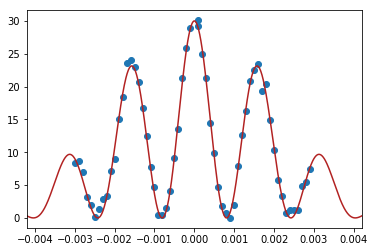

In [45]:
plt.scatter(position,y_medido)
plt.plot(y,30*Intensidad_interferencia(y,wave_length)*Intensidad_difraccion(function_alpha(y,wave_length)),color="firebrick", label="Dos rendijas")
plt.xlim(-4.2/1000,4.2/1000)
plt.show()

In [46]:
dat={"Distancia":position,"Voltaje":[530]*len(y_medido),"Conteos":y_medido}
datos_simulados=pd.DataFrame(dat)
datos_1=Intensidad_doble[Intensidad_doble["Voltaje"]==530].groupby("Distancia").mean().reset_index()
temporal=np.array(datos_1.Conteos+np.random.normal(0.01,1,len(datos_1.Conteos)))
d2={"Distancia":-np.array(datos_1["Distancia"]),"Voltaje":np.array(datos_1["Voltaje"]),"Conteos":temporal}
df2 = pd.DataFrame(d2)
datos_1=datos_1.append(df2,ignore_index=True)

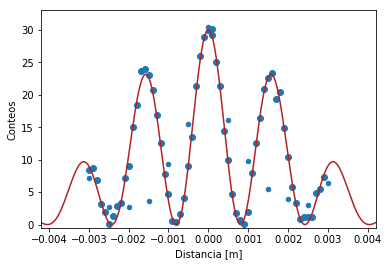

In [47]:
datos_1.plot("Distancia","Conteos",kind="scatter")
plt.scatter(position,y_medido)
plt.plot(y,30*Intensidad_interferencia(y,wave_length)*Intensidad_difraccion(function_alpha(y,wave_length)),color="firebrick", label="Dos rendijas")
plt.xlim(-4.2/1000,4.2/1000)
plt.ylim(-0.5,33)
plt.xlabel("Distancia [m]")
plt.show()

In [48]:
def incertidumbre_intensidad(x,a,wave_length,d):
    A=np.pi*a/wave_length
    B=np.pi*d/wave_length
    primero=-2*(np.sin(A*x)*np.cos(B*x))**2/(A**2*x**3)
    segundo=-2*B*(np.sin(A*x)**2)*np.sin(B*x)*np.cos(B*x)/(A*x)**2
    tercero=2*np.sin(A*x)*np.cos(A*x)*(np.cos(B*x)**2)
    return np.abs(primero+segundo+tercero)*1E-5

In [49]:
a=1.0*10**(-4)
wave_length=575*10**(-9)
d=35.6*10**(-5)
datos_simulados["Incertidumbre"]=incertidumbre_intensidad(np.array(datos_simulados.Distancia),a,wave_length,d)

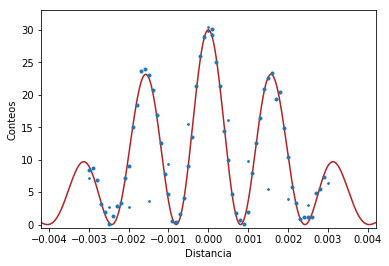

In [50]:
datos_1.plot("Distancia","Conteos",kind="scatter",s=3)
plt.plot(y,30*Intensidad_interferencia(y,wave_length)*Intensidad_difraccion(function_alpha(y,wave_length)),color="firebrick", label="Dos rendijas")
plt.errorbar(datos_simulados.Distancia,datos_simulados.Conteos,fmt="o",yerr=datos_simulados.Incertidumbre,ms=3)
plt.xlim(-4.2/1000,4.2/1000)
plt.ylim(-0.5,33)
plt.show()

In [51]:
def model_fit_data(distancia,I_0):
    wave_length=575*10**(-9)
    d=35.6*10**(-5)
    a=1.0*10**(-4)
    #I_0=30
    alpha=np.pi*a*distancia/wave_length
    difraccion= (np.sin(alpha)/alpha)**2
    interferencia=(np.cos((np.pi*d*distancia)/(wave_length)))**2
    return I_0*difraccion*interferencia


In [52]:
popt, pcov = curve_fit(model_fit_data, datos_simulados.Distancia, datos_simulados.Conteos,method="lm")

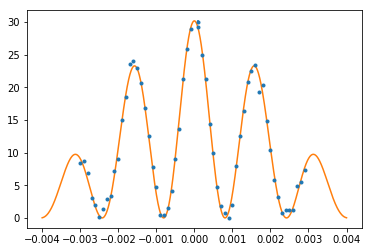

In [53]:
y=np.linspace(-4.0/1000,4.0/1000,1000)
plt.errorbar(datos_simulados.Distancia,datos_simulados.Conteos,fmt="o",yerr=datos_simulados.Incertidumbre,ms=3)
plt.plot(y,model_fit_data(y,popt[0]))

# minimos cuadrados

In [54]:
def model_fit_data_2(distancia,d):
    wave_length=575*10**(-9)
    #d=35.6*10**(-5)
    a=1.0*10**(-4)
    I_0=30
    alpha=np.pi*a*distancia/wave_length
    difraccion= (np.sin(alpha)/alpha)**2
    interferencia=(np.cos((np.pi*d*distancia)/(wave_length)))**2
    return I_0*difraccion*interferencia
def errfunc(distancia,param,datos):
    return model_fit_data_2(distancia, param) - datos

In [55]:
p0 = [35*10**(-5)]
p1, success = optimize.leastsq(errfunc, p0, args=(np.array(datos_simulados.Distancia),np.array(datos_simulados.Conteos)))

<ErrorbarContainer object of 3 artists>

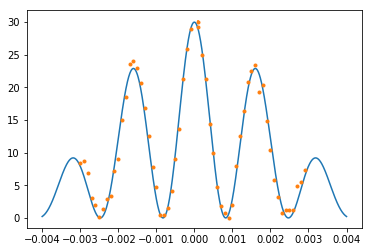

In [56]:
y=np.linspace(-4.0/1000,4.0/1000,1000)
plt.plot(y, model_fit_data_2(y, p1[0])) # Plot of the data and the fit
plt.errorbar(datos_simulados.Distancia,datos_simulados.Conteos,fmt="o",yerr=datos_simulados.Incertidumbre,ms=3)

# Ajuste con curve_fit que funciona

In [57]:
def model_fit_data(distancia,d,wave_length):
    #wave_length=575*10**(-9)
    #d=35.6*10**(-5)
    a=1.0*10**(-4)
    I_0=30
    alpha=np.pi*a*distancia/wave_length
    difraccion= (np.sin(alpha)/alpha)**2
    interferencia=(np.cos((np.pi*d*distancia)/(wave_length)))**2
    return I_0*difraccion*interferencia

In [58]:
p0 = [35*10**(-5),575*10**(-9)]
popt, pcov = curve_fit(model_fit_data, xdata=np.array(datos_simulados.Distancia), ydata=np.array(datos_simulados.Conteos), p0=p0) 
perr = np.sqrt(np.diag(pcov))

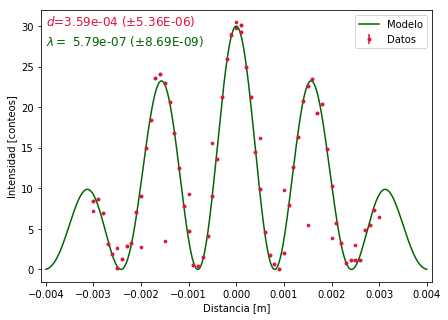

In [59]:
#plt.figure(figsize=(7,5))
y=np.linspace(-4.0/1000,4.0/1000,1000)
datos_1.plot("Distancia","Conteos",kind="scatter",s=7,figsize=(7,5),c="crimson",xlim=(-4.1/1000,4.1/1000))
plt.errorbar(datos_simulados.Distancia,datos_simulados.Conteos,fmt="o",yerr=datos_simulados.Incertidumbre,ms=3,label="Datos",color="crimson")
plt.plot(y,model_fit_data(y,popt[0],popt[1]),label="Modelo",color="darkgreen")
plt.legend(loc="best")
plt.text(np.min(y),np.max(datos_simulados.Conteos),r"$d$={:0.2e} ($\pm${:0.2E})".format(popt[0],perr[0]),fontsize=12,color="crimson")
plt.text(np.min(y),np.max(datos_simulados.Conteos)-2.5,r"$\lambda=$ {:0.2e} ($\pm${:0.2E})".format(popt[1],perr[1]),fontsize=12,color="darkgreen")
plt.xlabel("Distancia [m]")
plt.ylabel("Intensidad [conteos]")
plt.show()

# Fit a todos los datos

In [60]:
a=1.0*10**(-4)
wave_length=575*10**(-9)
d=35.6*10**(-5)
datos_exp=Intensidad_doble[(Intensidad_doble["Voltaje"]==530) & (Intensidad_doble["Distancia"]!=0)].groupby("Distancia").mean().reset_index()
temporal=np.array(datos_exp.Conteos+np.random.normal(0.01,1,len(datos_exp.Conteos)))
d2={"Distancia":-np.array(datos_exp["Distancia"]),"Voltaje":np.array(datos_exp["Voltaje"]),"Conteos":temporal}
df2 = pd.DataFrame(d2)
datos_exp=datos_exp.append(df2,ignore_index=True)
datos_exp["Incertidumbre"]=incertidumbre_intensidad(np.array(datos_exp.Distancia),a,wave_length,d)

In [61]:
datos_simulados=datos_simulados.append(datos_exp,ignore_index=True)

In [62]:
def model_interferencia(distancia,d,wave_length):
    #wave_length=575*10**(-9)
    #d=35.6*10**(-5)
    a=1.0*10**(-4)
    I_0=30
    alpha=np.pi*a*distancia/wave_length
    difraccion= (np.sin(alpha)/alpha)**2
    interferencia=(np.cos((np.pi*d*distancia)/(wave_length)))**2
    return I_0*difraccion*interferencia

In [63]:
p0 = [35*10**(-5),575*10**(-9)]
popt, pcov = curve_fit(model_interferencia, xdata=np.array(datos_simulados.Distancia), ydata=np.array(datos_simulados.Conteos), p0=p0) 
perr = np.sqrt(np.diag(pcov))

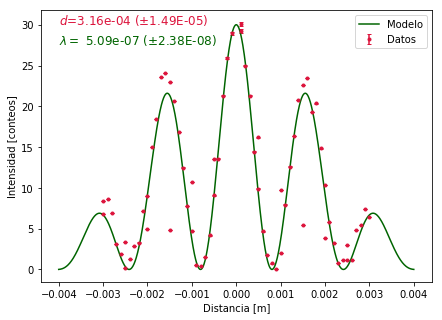

In [64]:
plt.figure(figsize=(7,5))
y=np.linspace(-4.0/1000,4.0/1000,1000)
plt.errorbar(datos_simulados.Distancia,datos_simulados.Conteos,fmt="o",yerr=datos_simulados.Incertidumbre,ms=3,capsize=2,label="Datos",color="crimson")
plt.plot(y,model_interferencia(y,popt[0],popt[1]),label="Modelo",color="darkgreen")
plt.legend(loc="best")
plt.text(np.min(y),np.max(datos_simulados.Conteos),r"$d$={:0.2e} ($\pm${:0.2E})".format(popt[0],perr[0]),fontsize=12,color="crimson")
plt.text(np.min(y),np.max(datos_simulados.Conteos)-2.5,r"$\lambda=$ {:0.2e} ($\pm${:0.2E})".format(popt[1],perr[1]),fontsize=12,color="darkgreen")
plt.xlabel("Distancia [m]")
plt.ylabel("Intensidad [conteos]")
#plt.savefig("Interferencia_verde.png")
plt.show()

In [65]:
datos_simulados["Error"]=np.random.normal(2.2069117718193114,0.9274938447654663,len(datos_simulados["Distancia"]))

In [66]:
datos_simulados.to_csv("Datos/datos_interferencia.csv",index=False)

In [67]:
p0 = [35*10**(-5),575*10**(-9)]
popt, pcov = curve_fit(model_interferencia, xdata=np.array(datos_simulados.Distancia), ydata=np.array(datos_simulados.Conteos), p0=p0,sigma=datos_simulados.Error,absolute_sigma= True) 
perr = np.sqrt(np.diag(pcov))

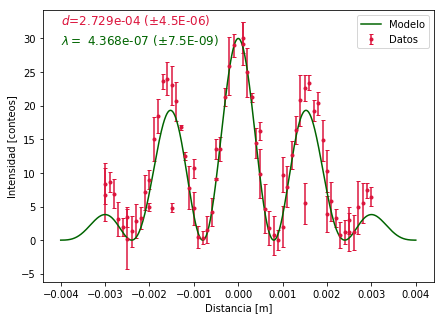

In [68]:
plt.figure(figsize=(7,5))
y=np.linspace(-4.0/1000,4.0/1000,1000)
plt.errorbar(datos_simulados.Distancia,datos_simulados.Conteos,fmt="o",yerr=datos_simulados.Error,ms=3,capsize=2,label="Datos",color="crimson")
plt.plot(y,model_interferencia(y,popt[0],popt[1]),label="Modelo",color="darkgreen")
plt.legend(loc="best")
plt.text(np.min(y),np.max(datos_simulados.Conteos)+np.max(datos_simulados.Error)-2.5,r"$d$={:0.3e} ($\pm${:0.1E})".format(popt[0],perr[0]),fontsize=12,color="crimson")
plt.text(np.min(y),np.max(datos_simulados.Conteos)+np.max(datos_simulados.Error)-5.5,r"$\lambda=$ {:0.3e} ($\pm${:0.1E})".format(popt[1],perr[1]),fontsize=12,color="darkgreen")
plt.xlabel("Distancia [m]")
plt.ylabel("Intensidad [conteos]")
plt.savefig("Figuras/Interferencia_verde.png")
plt.show()